# MC855 - Data analysis pyspark

## Initializing spark and data
 - Spark version 2.2.0
 - Change /home/henrique/Downloads/spark to the path you downloaded and extracted spark
 - You may need to export hadoop bin to your path before running jupyter notebook 
   - `export PATH=$PATH:/Users/hadoop/hadoop/bin`

In [1]:
# Import findspark 
import findspark

# Initialize and provide path
findspark.init("/home/henrique/Downloads/spark")

# Or use this alternative
#findspark.init()

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
       .master("local") \
       .appName("Linear Regression Model") \
       .config("spark.executor.memory", "1gb") \
       .getOrCreate()
   
sc = spark.sparkContext

## Loading directly from the csv
if this is working, the last frame is not needed anymore

In [3]:
import pyspark
sql = pyspark.sql.SQLContext(sc)

df = (sql.read
         .format("com.databricks.spark.csv")  # Choose the bib to oad csv
         .option("header", "true")            # Use the first line as header
         .option("inferSchema", "true")       # Try to infer data type - if this is not set all the typer will be str
         .load("games.csv"))                  # File name

In [4]:
df

DataFrame[gameId: bigint, gameDuration: int, seasonId: int, winner: int, firstBlood: int, firstTower: int, firstInhibitor: int, firstBaron: int, firstDragon: int, firstRiftHerald: int, t1_champ1id: int, t1_champ1_sum1: int, t1_champ1_sum2: int, t1_champ2id: int, t1_champ2_sum1: int, t1_champ2_sum2: int, t1_champ3id: int, t1_champ3_sum1: int, t1_champ3_sum2: int, t1_champ4id: int, t1_champ4_sum1: int, t1_champ4_sum2: int, t1_champ5id: int, t1_champ5_sum1: int, t1_champ5_sum2: int, t1_towerKills: int, t1_inhibitorKills: int, t1_baronKills: int, t1_dragonKills: int, t1_riftHeraldKills: int, t1_ban1: int, t1_ban2: int, t1_ban3: int, t1_ban4: int, t1_ban5: int, t2_champ1id: int, t2_champ1_sum1: int, t2_champ1_sum2: int, t2_champ2id: int, t2_champ2_sum1: int, t2_champ2_sum2: int, t2_champ3id: int, t2_champ3_sum1: int, t2_champ3_sum2: int, t2_champ4id: int, t2_champ4_sum1: int, t2_champ4_sum2: int, t2_champ5id: int, t2_champ5_sum1: int, t2_champ5_sum2: int, t2_towerKills: int, t2_inhibitorKil

### Excluding rows that are not needed

In [5]:
excludes = [
 't1_ban1',
 't1_ban2',
 't1_ban3',
 't1_ban4',
 't1_ban5',
 't1_champ1_sum1',
 't1_champ1_sum2',
 't1_champ1id',
 't1_champ2_sum1',
 't1_champ2_sum2',
 't1_champ2id',
 't1_champ3_sum1',
 't1_champ3_sum2',
 't1_champ3id',
 't1_champ4_sum1',
 't1_champ4_sum2',
 't1_champ4id',
 't1_champ5_sum1',
 't1_champ5_sum2',
 't1_champ5id',
 't2_ban1',
 't2_ban2',
 't2_ban3',
 't2_ban4',
 't2_ban5',
 't2_champ1_sum1',
 't2_champ1_sum2',
 't2_champ1id',
 't2_champ2_sum1',
 't2_champ2_sum2',
 't2_champ2id',
 't2_champ3_sum1',
 't2_champ3_sum2',
 't2_champ3id',
 't2_champ4_sum1',
 't2_champ4_sum2',
 't2_champ4id',
 't2_champ5_sum1',
 't2_champ5_sum2',
 't2_champ5id']

In [6]:
for exclude in excludes:
    df = df.drop(exclude)
    
print(df.columns)

['gameId', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']


In [7]:
df.printSchema()

root
 |-- gameId: long (nullable = true)
 |-- gameDuration: integer (nullable = true)
 |-- seasonId: integer (nullable = true)
 |-- winner: integer (nullable = true)
 |-- firstBlood: integer (nullable = true)
 |-- firstTower: integer (nullable = true)
 |-- firstInhibitor: integer (nullable = true)
 |-- firstBaron: integer (nullable = true)
 |-- firstDragon: integer (nullable = true)
 |-- firstRiftHerald: integer (nullable = true)
 |-- t1_towerKills: integer (nullable = true)
 |-- t1_inhibitorKills: integer (nullable = true)
 |-- t1_baronKills: integer (nullable = true)
 |-- t1_dragonKills: integer (nullable = true)
 |-- t1_riftHeraldKills: integer (nullable = true)
 |-- t2_towerKills: integer (nullable = true)
 |-- t2_inhibitorKills: integer (nullable = true)
 |-- t2_baronKills: integer (nullable = true)
 |-- t2_dragonKills: integer (nullable = true)
 |-- t2_riftHeraldKills: integer (nullable = true)



In [8]:
df.dtypes

[('gameId', 'bigint'),
 ('gameDuration', 'int'),
 ('seasonId', 'int'),
 ('winner', 'int'),
 ('firstBlood', 'int'),
 ('firstTower', 'int'),
 ('firstInhibitor', 'int'),
 ('firstBaron', 'int'),
 ('firstDragon', 'int'),
 ('firstRiftHerald', 'int'),
 ('t1_towerKills', 'int'),
 ('t1_inhibitorKills', 'int'),
 ('t1_baronKills', 'int'),
 ('t1_dragonKills', 'int'),
 ('t1_riftHeraldKills', 'int'),
 ('t2_towerKills', 'int'),
 ('t2_inhibitorKills', 'int'),
 ('t2_baronKills', 'int'),
 ('t2_dragonKills', 'int'),
 ('t2_riftHeraldKills', 'int')]

In [9]:
df.select('gameId','t1_inhibitorKills','t2_towerKills','winner').show(15)

+----------+-----------------+-------------+------+
|    gameId|t1_inhibitorKills|t2_towerKills|winner|
+----------+-----------------+-------------+------+
|3326086514|                1|            5|     0|
|3229566029|                4|            2|     0|
|3327363504|                1|            2|     0|
|3326856598|                2|            0|     0|
|3330080762|                2|            3|     0|
|3287435705|                1|            6|     0|
|3314215542|                2|            2|     0|
|3329224025|                0|            0|     0|
|3318040883|                0|            8|     1|
|3327786881|                1|            8|     1|
|3325996400|                0|           10|     1|
|3284613292|                1|            2|     0|
|3321570535|                0|            3|     0|
|3323144943|                1|            3|     0|
|3329332855|                1|            9|     1|
+----------+-----------------+-------------+------+
only showing

## Now, we need to start using MLlib - spark ml library

 - https://spark.apache.org/docs/2.2.0/ml-classification-regression.html#logistic-regression
 - http://people.duke.edu/~ccc14/sta-663-2016/21D_Spark_MLib.html
 - https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html
 - https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning#gs.fip6MdA
 - https://wesslen.github.io/twitter/predicting_twitter_profile_location_with_pyspark/

In [10]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression


from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.clustering import GaussianMixture
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel

### Separating features from target
 - The LogisticRegression function needs two Colums in df - label and features. (https://stackoverflow.com/questions/44475917/how-does-an-mllib-estimator-know-what-are-the-features-and-target-columns)
 - Features are the variables we are gonna use to predict the target variable
 - First, winner is gonna be the label as we want to know the winner
 - After, all the other info are gonna be the target

In [11]:
# Renaming winner to label
df = df.withColumnRenamed("winner","label")
df.printSchema()

root
 |-- gameId: long (nullable = true)
 |-- gameDuration: integer (nullable = true)
 |-- seasonId: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- firstBlood: integer (nullable = true)
 |-- firstTower: integer (nullable = true)
 |-- firstInhibitor: integer (nullable = true)
 |-- firstBaron: integer (nullable = true)
 |-- firstDragon: integer (nullable = true)
 |-- firstRiftHerald: integer (nullable = true)
 |-- t1_towerKills: integer (nullable = true)
 |-- t1_inhibitorKills: integer (nullable = true)
 |-- t1_baronKills: integer (nullable = true)
 |-- t1_dragonKills: integer (nullable = true)
 |-- t1_riftHeraldKills: integer (nullable = true)
 |-- t2_towerKills: integer (nullable = true)
 |-- t2_inhibitorKills: integer (nullable = true)
 |-- t2_baronKills: integer (nullable = true)
 |-- t2_dragonKills: integer (nullable = true)
 |-- t2_riftHeraldKills: integer (nullable = true)



### Inserting necessary fields insed features

In [12]:
feat_fields = ['gameDuration',
              'seasonId', 
              'firstBlood', 
              'firstTower', 
              'firstInhibitor', 
              'firstBaron', 
              'firstDragon', 
              'firstRiftHerald', 
              't1_towerKills', 
              't1_inhibitorKills', 
              't2_baronKills',
              't1_dragonKills', 
              't1_riftHeraldKills', 
              't2_towerKills', 
              't2_inhibitorKills',
              't2_baronKills',
              't2_dragonKills', 
              't2_riftHeraldKills']

In [13]:
assembler = VectorAssembler(inputCols=feat_fields, outputCol="features")
output = assembler.transform(df)

In [14]:
# The df will contain all the old Coluns and a new one features
# which will contain features we want
output.select('gameDuration','seasonId', 'features').show(20)

+------------+--------+--------------------+
|gameDuration|seasonId|            features|
+------------+--------+--------------------+
|        1949|       9|[1949.0,9.0,0.0,1...|
|        1851|       9|[1851.0,9.0,1.0,1...|
|        1493|       9|(18,[0,1,3,4,5,8,...|
|        1758|       9|(18,[0,1,2,3,4,5,...|
|        2094|       9|[2094.0,9.0,0.0,1...|
|        2059|       9|(18,[0,1,4,5,8,9,...|
|        1993|       9|[1993.0,9.0,1.0,0...|
|        1334|       9|(18,[0,1,2,3,7,8,...|
|        1387|       9|(18,[0,1,13,14,16...|
|        2681|       9|(18,[0,1,8,9,10,1...|
|        1391|       9|(18,[0,1,10,11,13...|
|        1671|       9|(18,[0,1,2,4,7,8,...|
|        2071|       9|[2071.0,9.0,1.0,1...|
|        1942|       9|(18,[0,1,4,6,8,9,...|
|        2374|       9|(18,[0,1,4,5,8,9,...|
|        1717|       9|(18,[0,1,3,4,6,8,...|
|        2390|       9|(18,[0,1,8,10,11,...|
|        1994|       9|[1994.0,9.0,0.0,1...|
|        1513|       9|(18,[0,1,2,13,14,...|
|        1

### Split our data into training set and test set

In [26]:
(trainingData, testData) = output.randomSplit([0.7, 0.3], seed = 1234)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 36084
Test Dataset Count: 15452


### Apply Logistic Regression

In [27]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0.8, family = "binomial")
lrModel = lr.fit(trainingData)

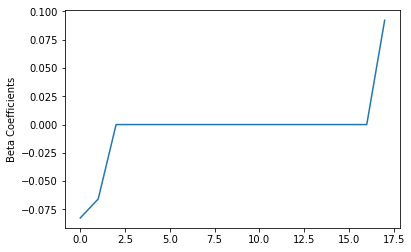

In [28]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

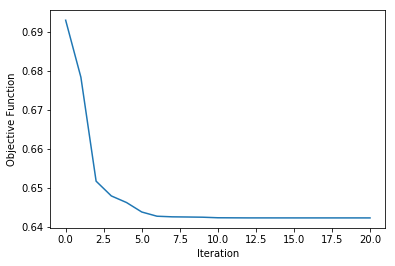

In [29]:
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

areaUnderROC: 0.9934172534653803


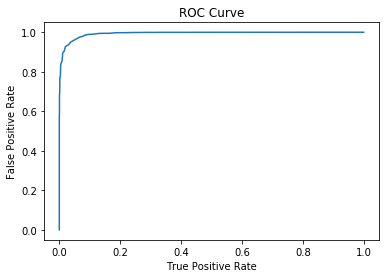

In [30]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

#trainingSummary.roc.show(n=10, truncate=15)
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

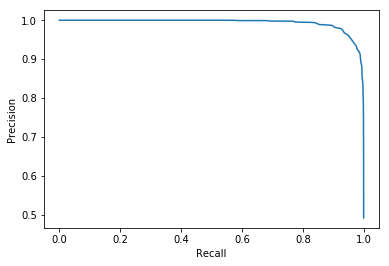

In [31]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [32]:
predictions = lrModel.transform(testData)

In [33]:
predictions.select("label","prediction","probability")\
           .show(n=10, truncate=40)

+-----+----------+----------------------------------------+
|label|prediction|                             probability|
+-----+----------+----------------------------------------+
|    1|       1.0|[0.31102410010767145,0.6889758998923285]|
|    0|       0.0| [0.637791927251582,0.36220807274841804]|
|    0|       0.0| [0.5741940636451258,0.4258059363548741]|
|    0|       0.0|[0.6631379598356968,0.33686204016430316]|
|    1|       1.0| [0.3496248658000024,0.6503751341999976]|
|    1|       1.0| [0.3663562926530106,0.6336437073469894]|
|    0|       0.0| [0.6121186442633195,0.3878813557366804]|
|    0|       0.0| [0.6355534292497721,0.3644465707502279]|
|    1|       0.0| [0.5109484846478908,0.4890515153521092]|
|    0|       1.0| [0.4940156640700304,0.5059843359299696]|
+-----+----------+----------------------------------------+
only showing top 10 rows



In [34]:
print("Number of correct prediction: " + str(predictions.filter(predictions['prediction'] == predictions['label']).count()))
print("Total of elements: " + str(testData.count()))

print(str(predictions.filter(predictions['prediction'] == predictions['label']).count()/testData.count()*100) + '%')

Number of correct prediction: 14776
Total of elements: 15452
95.62516179135388%


In [35]:
predictions.filter(predictions['prediction'] == predictions['label'])\
           .select("gameId","probability","label","prediction").show(20)

+----------+--------------------+-----+----------+
|    gameId|         probability|label|prediction|
+----------+--------------------+-----+----------+
|3214824413|[0.31102410010767...|    1|       1.0|
|3214825708|[0.63779192725158...|    0|       0.0|
|3214843995|[0.57419406364512...|    0|       0.0|
|3215041408|[0.66313795983569...|    0|       0.0|
|3215114840|[0.34962486580000...|    1|       1.0|
|3215119997|[0.36635629265301...|    1|       1.0|
|3215149108|[0.61211864426331...|    0|       0.0|
|3215193866|[0.63555342924977...|    0|       0.0|
|3215297742|[0.32683658370897...|    1|       1.0|
|3215303507|[0.67920433556204...|    0|       0.0|
|3215315292|[0.52911926498278...|    0|       0.0|
|3215369419|[0.63555342924977...|    0|       0.0|
|3215451229|[0.69894516220915...|    0|       0.0|
|3215465409|[0.27488384627604...|    1|       1.0|
|3215509559|[0.34523689153523...|    1|       1.0|
|3215522891|[0.56993336433123...|    0|       0.0|
|3215526825|[0.71601200948943..

In [36]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
print("Training: Area Under ROC: " + str(trainingSummary.areaUnderROC))

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Training: Area Under ROC: 0.9934172534653803
Test: Area Under ROC: 0.9945049001405329
